# Multiple Linear Regression

### Importing the Libraries and the Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('50_Startups.csv')

In [4]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Spliting Dataset to Matrix of Features and the Dependent Variable

In [5]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [6]:
x

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [7]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

### Checking for missing Data to address

In [8]:
data.isnull().values.any()

False

### Encoding Categorical data as Machine-Learning Algorithm works with Numerical Inputs and outputs

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [10]:
x

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

### Split Dataset into Training data and Test data

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [12]:
x_test

array([[0.0, 0.0, 1.0, 72107.6, 127864.55, 353183.81],
       [0.0, 0.0, 1.0, 46014.02, 85047.44, 205517.64],
       [1.0, 0.0, 0.0, 28754.33, 118546.05, 172795.67],
       [0.0, 0.0, 1.0, 20229.59, 65947.93, 185265.1],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 0.0, 1.0, 542.05, 51743.15, 0.0],
       [0.0, 0.0, 1.0, 65605.48, 153032.06, 107138.38],
       [0.0, 1.0, 0.0, 1315.46, 115816.21, 297114.46],
       [0.0, 0.0, 1.0, 61136.38, 152701.92, 88218.23]], dtype=object)

In [13]:
y_train

array([ 97427.84,  81005.76, 111313.02,  90708.19, 122776.86,  71498.49,
        14681.4 , 105733.54, 110352.25, 134307.35,  77798.83, 125370.37,
        64926.08, 108552.04, 108733.99, 166187.94,  96778.92, 132602.65,
        99937.59, 146121.95, 103282.38,  65200.33,  96712.8 , 124266.9 ,
       118474.03, 107404.34, 156122.51, 155752.6 ,  42559.73, 191792.06,
       126992.93, 192261.83, 129917.04, 156991.12, 144259.4 , 149759.96,
       152211.77, 141585.52,  69758.98,  89949.14])

### Train the model on the training set

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

### Predicting the test result and Checking if the model has actually learned

In [15]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=1)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[114664.4 105008.3]
 [ 90593.2  96479.5]
 [ 75692.8  78239.9]
 [ 70221.9  81229.1]
 [179790.3 191050.4]
 [171576.9 182902. ]
 [ 49753.6  35673.4]
 [102276.7 101004.6]
 [ 58649.4  49490.8]
 [ 98272.   97483.6]]


In [16]:
x_test[:, 3]

array([72107.6, 46014.02, 28754.33, 20229.59, 153441.51, 144372.41,
       542.05, 65605.48, 1315.46, 61136.38], dtype=object)

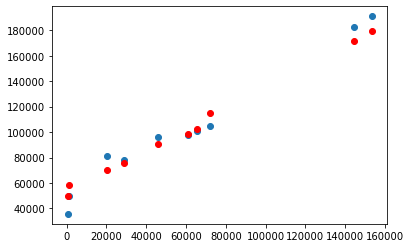

In [17]:
# Just picking the R and D column and plotting against the y_test and y_pred to check if the model actually got trained
plt.scatter(x_test[:, 3], y_test)
plt.scatter(x_test[:, 3], y_pred, color = 'red')

### Predicting the profit for a single company.
#### For Example the Profit for two separate companies in New York with Different Admin, R & D Spend, and Marketing Spend is:

In [18]:
print("The Profit is: $",regressor.predict([[0.0, 0.0, 1.0, 140000, 160000, 300000]]))

The Profit is: $ [165394.9]


In [19]:
print("The Profit is: $",regressor.predict([[0.0, 0.0, 1.0, 160000, 130000, 470000]]))

The Profit is: $ [186081.2]


In [20]:
print(regressor.coef_)

[-2.9e+02  3.0e+02 -1.2e+01  7.7e-01 -9.4e-03  2.9e-02]


In [21]:
print(regressor.intercept_)

49834.88507321703


### Regressor Model Selection - Evaluating the Model Performance

In [22]:
y_test

array([105008.3,  96479.5,  78239.9,  81229.1, 191050.4, 182902. ,
        35673.4, 101004.6,  49490.8,  97483.6])

In [23]:
y_pred

array([114664.4,  90593.2,  75692.8,  70221.9, 179790.3, 171576.9,
        49753.6, 102276.7,  58649.4,  98272. ])

In [24]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9649618042060633

### The abbove R-Square_Score shows that The Linear Regression Model learns the relationship of the Data set well and is about 96% accurate with its predictions